In [1]:
import math

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import scipy

import PeakTools

# %matplotlib notebook
%matplotlib inline

In [2]:
PeakTools.harmonic_peak_height_ratio_klist_clist([1,2,3,4,5,6],.5, [.1,.1],[1,2])

array([ 0.28441979,  0.36949964,  0.32595989,  0.24277434,  0.18057634,
        0.13960222])

In [3]:
MAX_ORDER = 4
o_list = [[1], [2], [3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14], [1,3], [7,5],[9,7],[10,9],[1,2,3]]

# Citeable Tetracene in Toluene

![See dat spectra...](tetracene_citeable_toluene.jpeg "Tetracene in Toluene")

In [4]:
#From DataThief
ZERO_PAD = 100

tetracene_toluene_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_toluene.csv", delimiter=",")

tetracene_toluene_wavelength_nm = tetracene_toluene_spectra[:,0] 
tetracene_toluene_wavenumbers = 1 / (tetracene_toluene_wavelength_nm * 1e-7)
tetracene_toluene_abs = tetracene_toluene_spectra[:,1] 
# tetracene_toluene_abs = -np.log(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs - np.min(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs/tetracene_toluene_wavenumbers**2
tetracene_toluene_abs = tetracene_toluene_abs /np.max(tetracene_toluene_abs)

tetracene_toluene_wavenumbers, tetracene_toluene_abs = PeakTools.left_zero_pad_spectra(tetracene_toluene_wavenumbers, tetracene_toluene_abs, ZERO_PAD)

In [5]:
tetracene_toluene_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28168.][0:-1]
tetracene_toluene_peak_height_guesses = [.95, .76, .35, .14, .05, .014][0:-1]
width_guess_wavenumbers = 100.0

In [6]:
tetracene_toluene_fit = PeakTools.SpectraFit(spectral_energies=tetracene_toluene_wavenumbers, 
                           spectral_amplitudes=tetracene_toluene_abs, 
                           approx_peak_energies = tetracene_toluene_peak_energy_guesses, 
                           approx_peak_heights = tetracene_toluene_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 3.47282516499
sqrt-diagonal valus 
('anharmonic fit', array([   -25.30163669,   1491.40759951,  20363.92763647]))
('chi', 0.016964937485633585)
max bound n=28
r^2=0.999908581893

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.71378128041
sqrt-diagonal valus 
('anharmonic fit', array([ -1.24275241e+01,   1.45385320e+03,   2.03792509e+04]))
('chi', 0.0085479909658361924)
max bound n=57
r^2=0.999956578603

---------VOIGT---------

voigt profile fit to spectra with cost 1.01412956667
sqrt-diagonal valus 
('anharmonic fit', array([  1.15781186e+00,   1.38887417e+03,   2.04200591e+04]))
('chi', -0.00083363337302017504)
max bound n=-601
r^2=0.999951742569


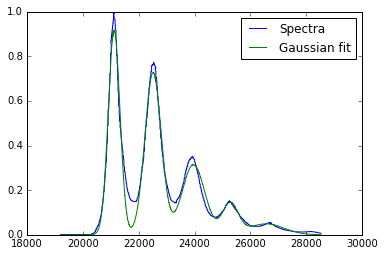

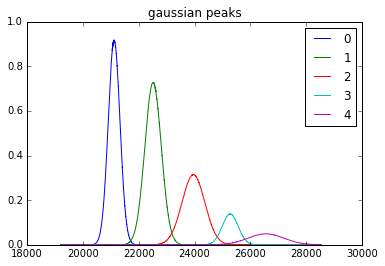

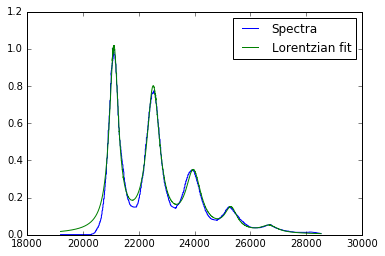

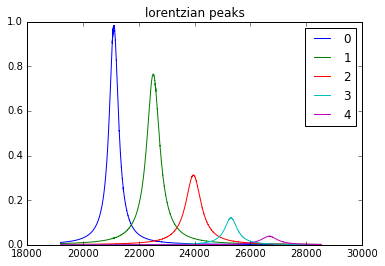

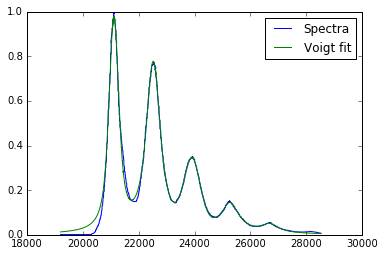

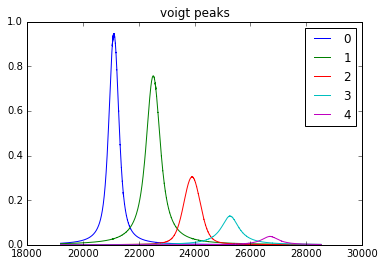

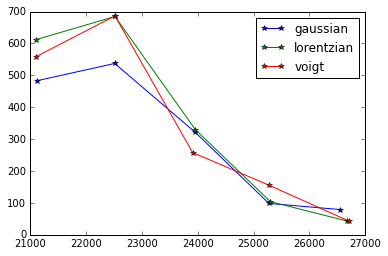

In [7]:
tetracene_toluene_fit.fit_and_observe_spectra()

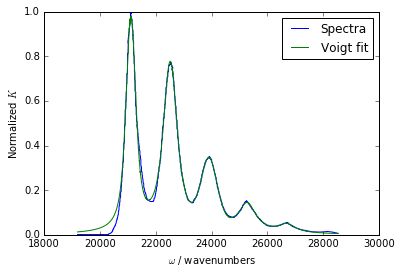

In [8]:
tetracene_toluene_fit.plot_spectral_fit(["voigt"])
# #plt.title("Tetracene in Toluene")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("toluene_spectra_fit.png", dpi=900)

In [9]:
tetracene_toluene_fit.explore_non_condon_orders(max_order=None, order_lists_to_calculate = o_list, method_str="voigt")

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[1]: [7032783.3304408146, inf]


check for big off-diagonal values: 
[[  1.80837737e+13   8.30562648e+12]
 [  8.30562648e+12   3.81465906e+12]] 


HO/c model fit Found for voigt!  S=1.18515012345(1 +/- 7032783.33044), mu=[ 0.] * x^ [1] * (1 +/- [inf]) @ 95% Confidence
Naiive S_Condon=1.18515012345
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 2 better models were found


 relative parameter errors for order[2]: [0.25373479443398306, 12.336751560510008]


check for big off-diagonal values: 
[[ 0.02419227  0.00365615]
 [ 0.00365615  0.00126354]] 


HO/c model fit Found for voigt!  S=1.2014738348(1 +/- 0.253734794434), mu=[ 0.00564741] * x^ [2] * (1 +/- [12.336751560510008]) @ 95% Confidence
Naiive S_Condon=1.18515012345
[3] order non-condon perturbation calcu

PeakTools.py:372: RuntimeWarning: divide by zero encountered in double_scalars
  err = 1.96 * math.sqrt(cov_matrix[i,i] / abs(df)) / param


Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[3]: [0.39214811674889416, -3.1949189392254862]


check for big off-diagonal values: 
[[ 0.04528822  0.00347465]
 [ 0.00347465  0.0003421 ]] 


HO/c model fit Found for voigt!  S=1.06364951253(1 +/- 0.392148116749), mu=[-0.0113468] * x^ [3] * (1 +/- [-3.1949189392254862]) @ 95% Confidence
Naiive S_Condon=1.18515012345
[4] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[4]: [0.25701262530099594, -3.5998103500831711]


check for big off-diagonal values: 
[[  2.17666176e-02   4.84924127e-04]
 [  4.84924127e-04   2.08225619e-05]] 


HO/c model fit Found for voigt!  S=1.12511544763(1 +/- 0.257012625301), mu=[-0.00248453] * x^ [4] * (1 +/- [-3.5998103500831711]) @ 95% Confidence
Naiive S_Condon=1.18515012345
[5] order non-condon perturbation calculation

---------VOIGT------

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.2014738348(1 +/- 0.253734794434), mu=[ 0.00564741] * x^ [2] * (1 +/- [12.336751560510008]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.830109005471 	 improvement_factor = 1.0009247548


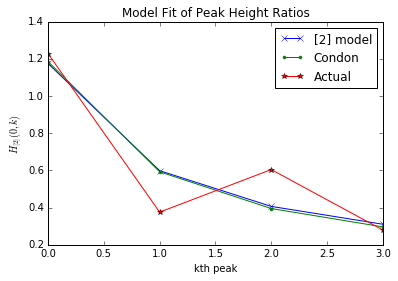

In [10]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=[2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.975511287118(1 +/- 1.25204838233), mu=[-0.042502   -0.01126506] * x^ [1, 3] * (1 +/- [-16.413751174467514, -3.9930195893558524]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.839911877184 	 improvement_factor = 1.01274481325


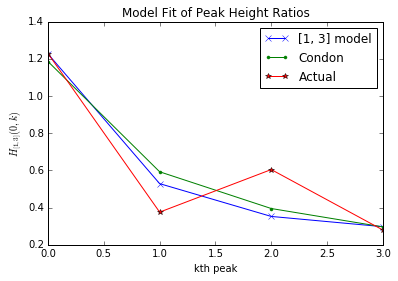

In [11]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[1,3], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_13.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[2, 4]: [0.25730999241217967, 1.4131450130862566, -1.3687415642732175]


check for big off-diagonal values: 
[[  2.06756906e-02  -8.52028597e-04   6.86653502e-04]
 [ -8.52028597e-04   3.49083289e-03  -4.67552692e-04]
 [  6.86653502e-04  -4.67552692e-04   8.69531684e-05]] 


HO/c model fit Found for voigt!  S=1.09529078(1 +/- 0.257309992412), mu=[ 0.08194715 -0.01335295] * x^ [2, 4] * (1 +/- [1.4131450130862566, -1.3687415642732175]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.883821788721 	 improvement_factor = 1.06569029047


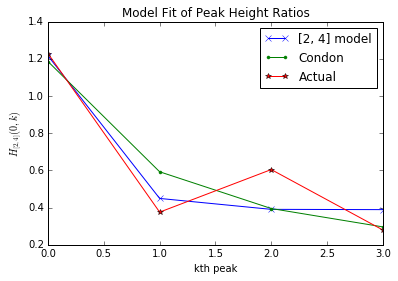

In [12]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[2,4], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

PREPARING ANALYSIS FOR A [5, 3, 1]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[5, 3, 1]: [0.041774099591236555, -0.056957804760511856, 0.064483982052176272, -0.10296168417371865]


check for big off-diagonal values: 
[[  4.44361817e-04  -1.35487133e-06   3.21609655e-05   1.29924358e-04]
 [ -1.35487133e-06   1.08803471e-07  -1.03380908e-06   1.08328569e-07]
 [  3.21609655e-05  -1.03380908e-06   1.33178860e-05  -8.18577809e-06]
 [  1.29924358e-04   1.08328569e-07  -8.18577809e-06   1.16926709e-04]] 


HO/c model fit Found for voigt!  S=0.989047934613(1 +/- 0.0417740995912), mu=[-0.01135074  0.11092307 -0.20584357] * x^ [5, 3, 1] * (1 +/- [-0.056957804760511856, 0.064483982052176272, -0.10296168417371865]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.999843345211 	 improvement_factor = 1.2055861

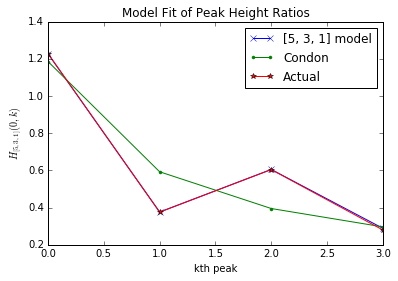

In [13]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[5,3,1], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_531.png", dpi=900)

# Tetracene in DCE
## Orange in the image below

![See dat spectra...](tetracene_citeable_dichloroethene.png "Tetracene in DCE")

In [14]:
#From DataThief
tetracene_dce_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_dichloroethene.csv", delimiter=",")

tetracene_dce_wavelength_nm = tetracene_dce_spectra[:,0] 
tetracene_dce_wavenumbers = 1 / (tetracene_dce_wavelength_nm * 1e-7)
tetracene_dce_abs = tetracene_dce_spectra[:,1]
tetracene_dce_abs = tetracene_dce_abs - np.min(tetracene_dce_abs)
tetracene_dce_abs = tetracene_dce_abs/tetracene_dce_wavenumbers**2
tetracene_dce_abs = tetracene_dce_abs / np.max(tetracene_dce_abs)
tetracene_dce_abs = np.flipud(tetracene_dce_abs)
tetracene_dce_wavenumbers= np.flipud(tetracene_dce_wavenumbers)

In [15]:
ZERO_PAD = 100

tetracene_dce_wavenumbers, tetracene_dce_abs = PeakTools.left_zero_pad_spectra(tetracene_dce_wavenumbers, tetracene_dce_abs, ZERO_PAD)

In [16]:
tetracene_dcm_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28114.]
tetracene_dcm_peak_height_guesses = [.97, .82, .37, .15, .05, .01]
#maybe rpeplace with the toluene numbers.  they worked well enough
width_guess_wavenumbers = 100.0


In [17]:
tetracene_dce_fit = PeakTools.SpectraFit(spectral_energies=tetracene_dce_wavenumbers, 
                           spectral_amplitudes=tetracene_dce_abs, 
                           approx_peak_energies = tetracene_dcm_peak_energy_guesses, 
                           approx_peak_heights = tetracene_dcm_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 1.36519348402
sqrt-diagonal valus 
('anharmonic fit', array([ -3.49366960e+00,   1.39781195e+03,   2.04450937e+04]))
('chi', 0.0024993845616929971)
max bound n=199
r^2=0.999500307945

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.84596905068
sqrt-diagonal valus 
('anharmonic fit', array([ -9.51235100e+00,   1.45282353e+03,   2.03861926e+04]))
('chi', 0.0065474923898515679)
max bound n=75
r^2=0.999988032064

---------VOIGT---------

voigt profile fit to spectra with cost 0.823995752552
sqrt-diagonal valus 
('anharmonic fit', array([   -27.66318032,   1529.72353051,  20332.98307984]))
('chi', 0.018083777734320159)
max bound n=26
r^2=0.999459752651


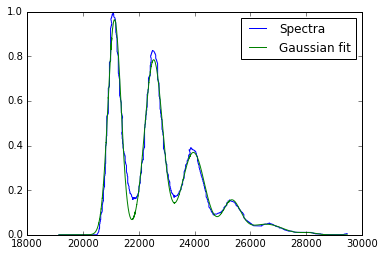

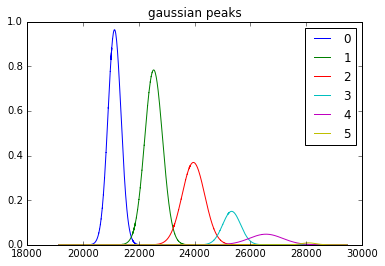

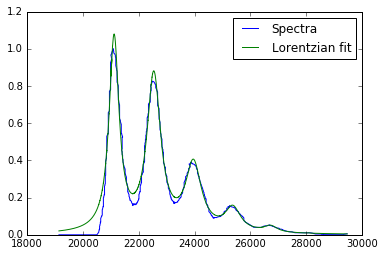

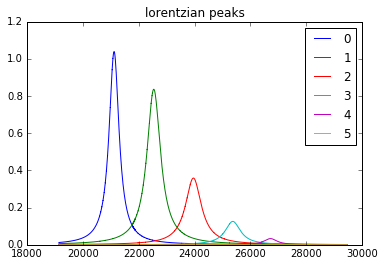

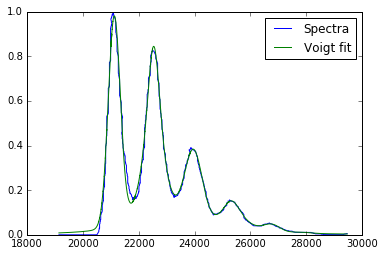

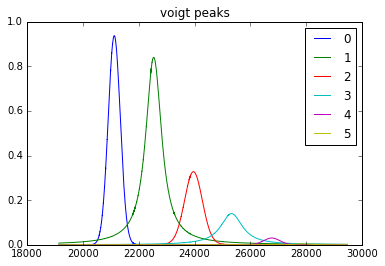

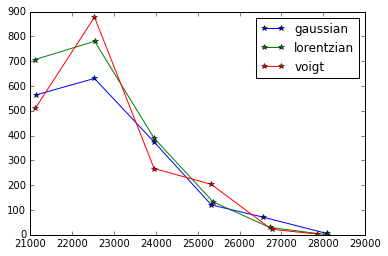

In [18]:
tetracene_dce_fit.fit_and_observe_spectra()

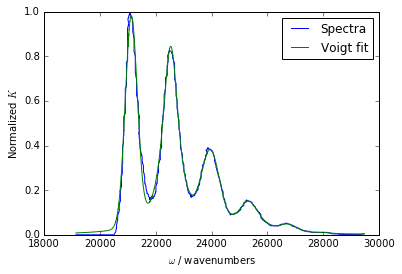

In [19]:
tetracene_dce_fit.plot_spectral_fit(["voigt"])
# #plt.title("Tetracene in DCM")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("dcm_spectra_fit.png", dpi=900)

In [20]:
tetracene_dce_fit.explore_non_condon_orders(max_order = None, order_lists_to_calculate=o_list, method_str="voigt")

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[1]: [18065464.044114757, inf]


check for big off-diagonal values: 
[[  1.88532735e+14   7.72336600e+13]
 [  7.72336600e+13   3.16392708e+13]] 


HO/c model fit Found for voigt!  S=1.48970519775(1 +/- 18065464.0441), mu=[ 0.] * x^ [1] * (1 +/- [inf]) @ 95% Confidence
Naiive S_Condon=1.48970519775
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 2 better models were found


 relative parameter errors for order[2]: [0.29893031493925726, -1.1490718701081764]


check for big off-diagonal values: 
[[ 0.03708519  0.00487199]
 [ 0.00487199  0.00135276]] 


HO/c model fit Found for voigt!  S=1.26265975099(1 +/- 0.298930314939), mu=[-0.06273637] * x^ [2] * (1 +/- [-1.1490718701081764]) @ 95% Confidence
Naiive S_Condon=1.48970519775
[3] order non-condon perturbation ca

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.2014738348(1 +/- 0.253734794434), mu=[ 0.00564741] * x^ [2] * (1 +/- [12.336751560510008]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.830109005471 	 improvement_factor = 1.0009247548


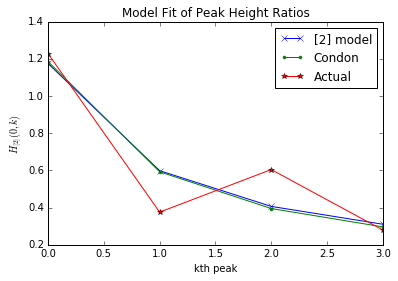

In [21]:
tetracene_toluene_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.26265975099(1 +/- 0.298930314939), mu=[-0.06273637] * x^ [2] * (1 +/- [-1.1490718701081764]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.832686767806 	 improvement_factor = 1.07603977837


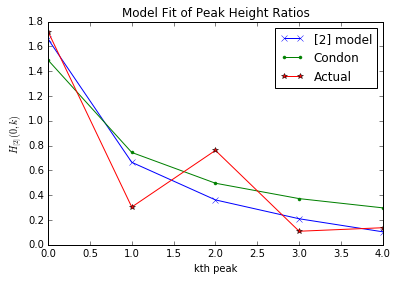

In [22]:
tetracene_dce_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("dcm_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 3 better models were found


 relative parameter errors for order[2, 4]: [0.31425548627285066, 5.7780134705593262, -1.9823554099897298]


check for big off-diagonal values: 
[[ 0.034076   -0.00617389  0.00169598]
 [-0.00617389  0.01043245 -0.00154918]
 [ 0.00169598 -0.00154918  0.00026117]] 


HO/c model fit Found for voigt!  S=1.15132390602(1 +/- 0.314255486273), mu=[ 0.0346474 -0.0159784] * x^ [2, 4] * (1 +/- [5.7780134705593262, -1.9823554099897298]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.864518316453 	 improvement_factor = 1.11717410868
PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.09529078(1 +/- 0.257309992412), mu=[ 0.08194715 -0.01335295] * x^ [2, 4] * (1 +/- [1.4131450130862566, -1

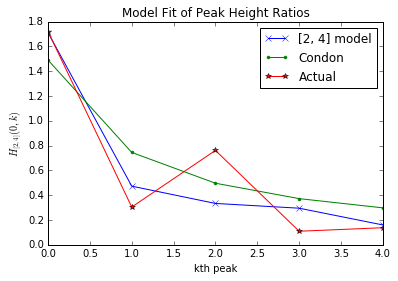

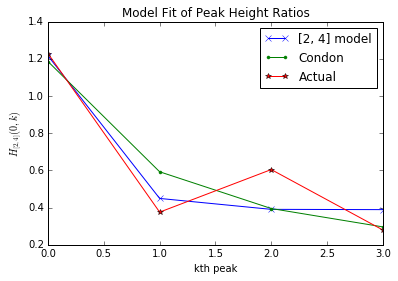

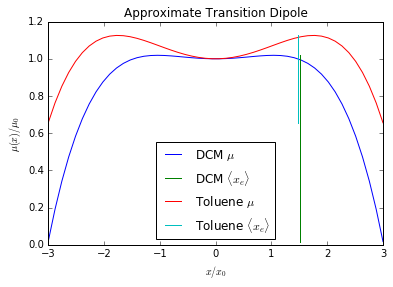

In [23]:
order = [2,4]
tfs=True
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_24.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method,  label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_24.png", dpi=900)


PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.77834892387(1 +/- 0.41694191261), mu=[ 0.3356194  -0.03399227] * x^ [1, 3] * (1 +/- [1.0470454096234791, -1.7705467729130315]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.831067358605 	 improvement_factor = 1.07394709624
PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.975511287118(1 +/- 1.25204838233), mu=[-0.042502   -0.01126506] * x^ [1, 3] * (1 +/- [-16.413751174467514, -3.9930195893558524]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.839911877184 	 improvement_factor = 1.01274481325


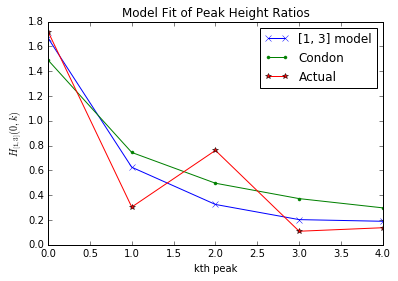

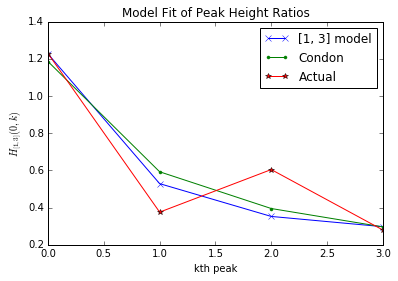

In [24]:
order = [1,3]
method = "voigt"
tfs=True
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_13.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_13.png", dpi=900)


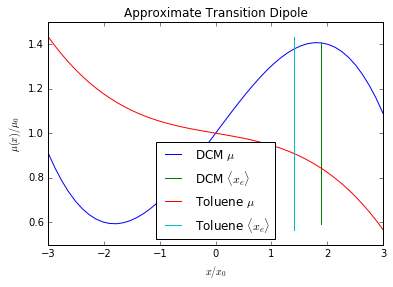

In [25]:
x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_13.png", dpi=900)

In [26]:
PeakTools.table_generator([1,3], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (1, 3) }$ & 1.778  &  0.976 \\
$c_{ 1 }$ & 3.36e-01  &  -4.25e-02 \\
$c_{ 3 }$ & -3.40e-02  &  -1.13e-02 \\
$r^2_{ (1, 3) }$ & 0.831  &  0.840 \\


PREPARING ANALYSIS FOR A [5, 3, 1]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 2 better models were found


 relative parameter errors for order[5, 3, 1]: [0.30847903974046537, -0.3943683035800985, 0.51611845748051788, -0.71357350274265707]


check for big off-diagonal values: 
[[  2.03937436e-02  -9.67220222e-05   2.16816191e-03   3.51455254e-03]
 [ -9.67220222e-05   1.04455320e-05  -8.55195293e-05  -2.53615458e-05]
 [  2.16816191e-03  -8.55195293e-05   1.29007647e-03  -2.07114657e-03]
 [  3.51455254e-03  -2.53615458e-05  -2.07114657e-03   1.40651849e-02]] 


HO/c model fit Found for voigt!  S=0.907358450837(1 +/- 0.30847903974), mu=[-0.01606273  0.13640001 -0.32575424] * x^ [5, 3, 1] * (1 +/- [-0.3943683035800985, 0.51611845748051788, -0.71357350274265707]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.973839318612 	 improvement_factor = 1.25844421346
PREP

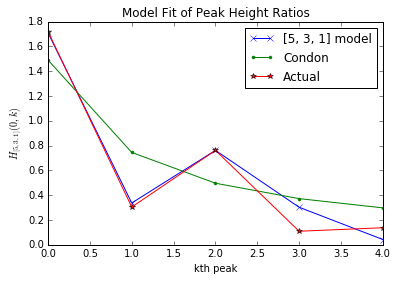

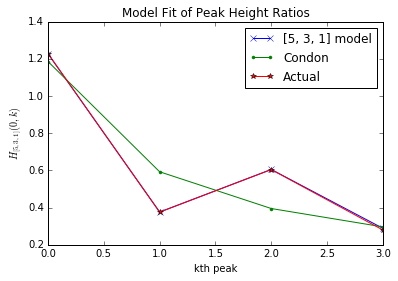

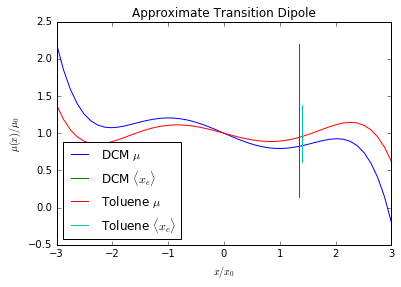

In [27]:
order = [5,3,1]
tfs=True
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)


In [28]:
PeakTools.table_generator(order, tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (5, 3, 1) }$ & 0.907  &  0.989 \\
$c_{ 5 }$ & -1.61e-02  &  -1.14e-02 \\
$c_{ 3 }$ & 1.36e-01  &  1.11e-01 \\
$c_{ 1 }$ & -3.26e-01  &  -2.06e-01 \\
$r^2_{ (5, 3, 1) }$ & 0.974  &  1.000 \\


PREPARING ANALYSIS FOR A [7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.912899026588(1 +/- 0.165406163716), mu=[-0.00064763] * x^ [7] * (1 +/- [-0.33988250777799278]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.957023111207 	 improvement_factor = 1.23671346333
PREPARING ANALYSIS FOR A [7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.879423692017(1 +/- 0.166852703211), mu=[-0.00037303] * x^ [7] * (1 +/- [-0.51220889136822734]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.93990357067 	 improvement_factor = 1.13331230574


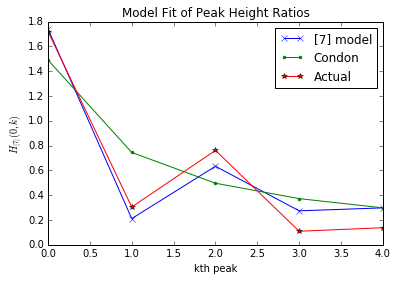

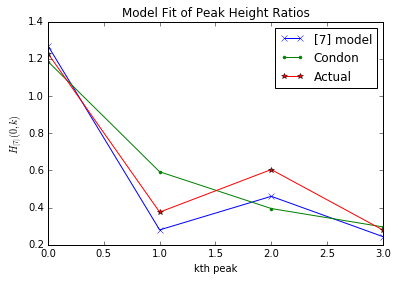

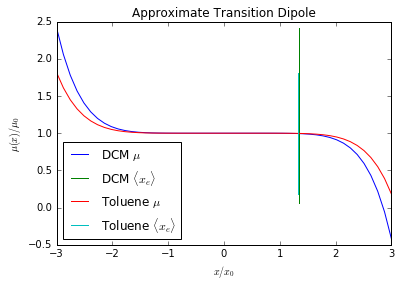

In [29]:
order = [7]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [8]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.999702053768(1 +/- 0.0997183445814), mu=[-0.00015378] * x^ [8] * (1 +/- [-0.23439451446288703]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.984235635686 	 improvement_factor = 1.27187885798
PREPARING ANALYSIS FOR A [8]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.998117385238(1 +/- 0.147535101258), mu=[ -6.74604008e-05] * x^ [8] * (1 +/- [-0.66097682370145483]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.936550937195 	 improvement_factor = 1.12926978384


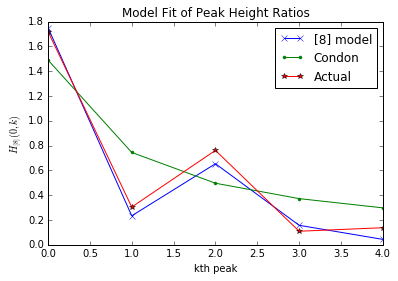

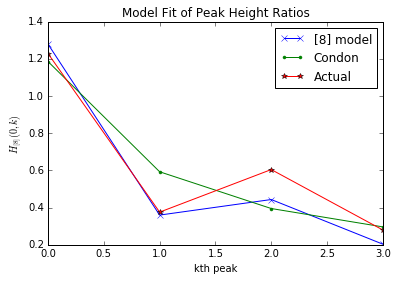

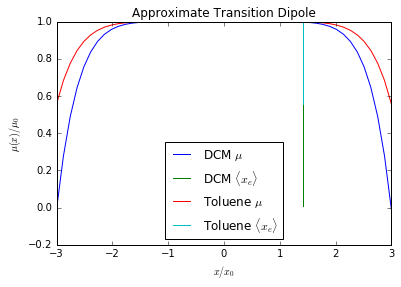

In [30]:
order = [8]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.08168318281(1 +/- 0.0877351219352), mu=[ -3.30646936e-05] * x^ [9] * (1 +/- [-0.22477790509046638]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.984693217046 	 improvement_factor = 1.27247016765
PREPARING ANALYSIS FOR A [9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.994102444023(1 +/- 0.102623691947), mu=[ -1.81672976e-05] * x^ [9] * (1 +/- [-0.41131566966346361]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.965193454327 	 improvement_factor = 1.1638062173


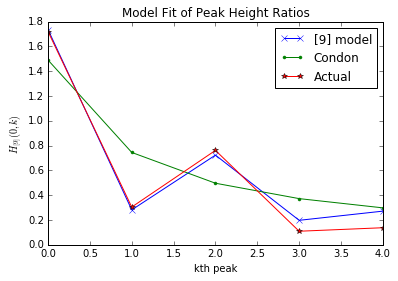

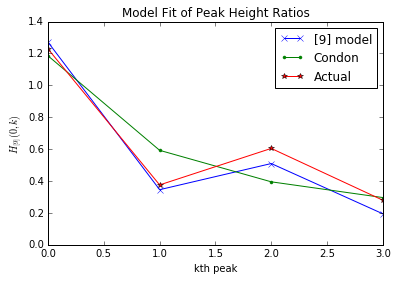

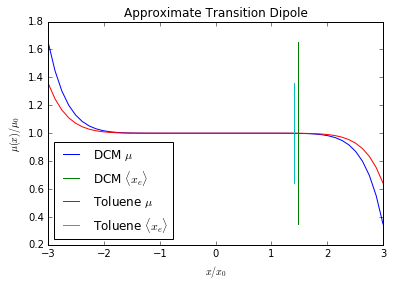

In [31]:
order = [9]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [7, 5]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.12621117649(1 +/- 0.18765711115), mu=[-0.00110057  0.00788031] * x^ [7, 5] * (1 +/- [-0.24510068045253633, 0.61689947506433152]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.988002801104 	 improvement_factor = 1.27674697886
PREPARING ANALYSIS FOR A [7, 5]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.18980157682(1 +/- 0.057769085738), mu=[-0.00076312  0.00807743] * x^ [7, 5] * (1 +/- [-0.13224439995055545, 0.18449507610603405]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.995922421793 	 improvement_factor = 1.20085844059


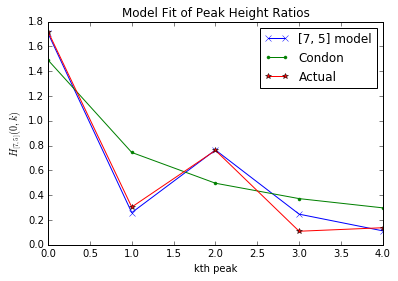

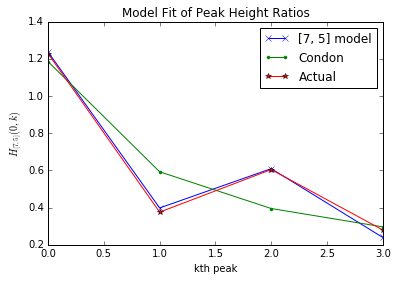

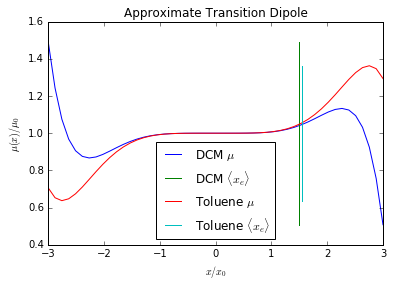

In [32]:
order = [7,5]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [9, 7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20162019261(1 +/- 0.141489131768), mu=[ -5.05049590e-05   3.71815990e-04] * x^ [9, 7] * (1 +/- [-0.33213332487827302, 0.96930712348196524]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.990011534719 	 improvement_factor = 1.2793427656
PREPARING ANALYSIS FOR A [9, 7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.1096344627(1 +/- 0.129849905286), mu=[ -3.35073847e-05   3.30958117e-04] * x^ [9, 7] * (1 +/- [-0.50658085001055508, 0.98497405915534975]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.975680664897 	 improvement_factor = 1.1764514345


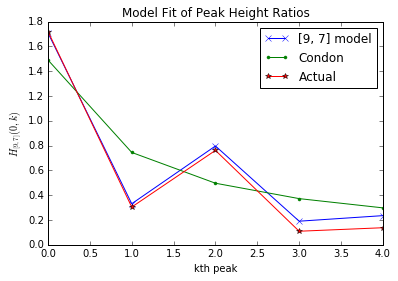

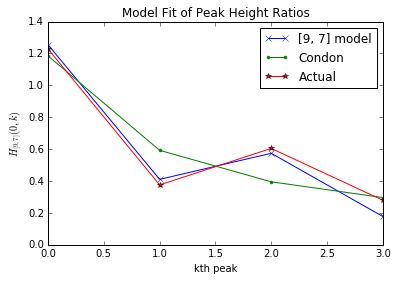

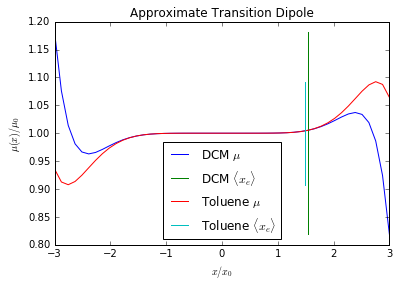

In [33]:
order = [9,7]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [10]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.13361728933(1 +/- 0.0495932237912), mu=[ -7.32508603e-06] * x^ [10] * (1 +/- [-0.13315717544952699]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.995775986878 	 improvement_factor = 1.286791881
PREPARING ANALYSIS FOR A [10]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.04342724148(1 +/- 0.100851414119), mu=[ -3.70094093e-06] * x^ [10] * (1 +/- [-0.46490828312532684]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.96073492388 	 improvement_factor = 1.15843023238


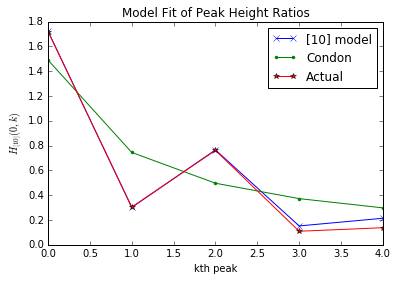

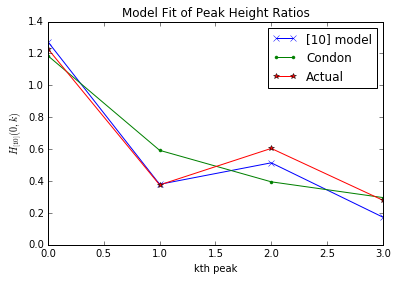

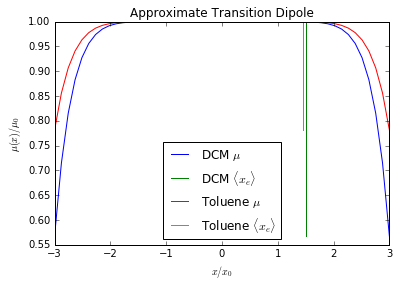

In [34]:
order = [10]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [10, 9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20265515258(1 +/- 0.072745415154), mu=[ -1.37109797e-05   3.05469248e-05] * x^ [10, 9] * (1 +/- [-0.40975425810360616, 0.89858116594298332]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.99791428932 	 improvement_factor = 1.28955510311
PREPARING ANALYSIS FOR A [10, 9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.924848659015(1 +/- 0.131466397976), mu=[  5.59048022e-06  -4.54684801e-05] * x^ [10, 9] * (1 +/- [1.6585917238647601, -0.97072447227122571]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.969804021964 	 improvement_factor = 1.16936552488


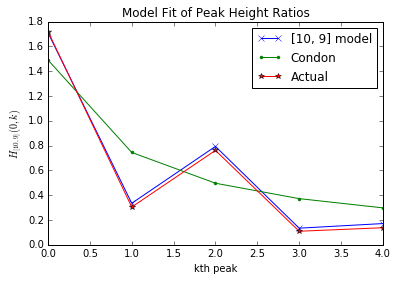

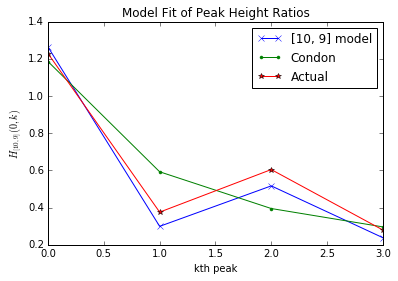

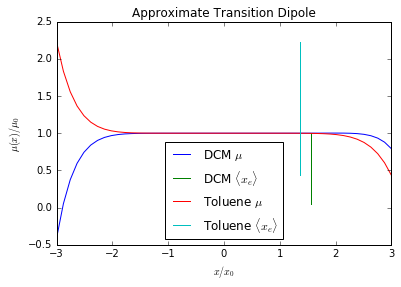

In [35]:
order = [10,9]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.26265975099(1 +/- 0.298930314939), mu=[-0.06273637] * x^ [2] * (1 +/- [-1.1490718701081764]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.832686767806 	 improvement_factor = 1.07603977837
PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.2014738348(1 +/- 0.253734794434), mu=[ 0.00564741] * x^ [2] * (1 +/- [12.336751560510008]) @ 95% Confidence
Naiive S_Condon=1.18515012345
peak ratio goodness of fit:
r^2_condon = 0.829342067414 	 r^2_model = 0.830109005471 	 improvement_factor = 1.0009247548


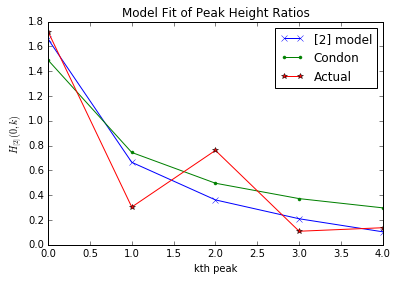

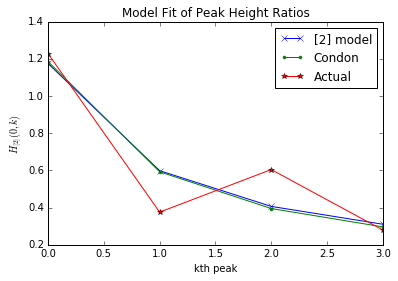

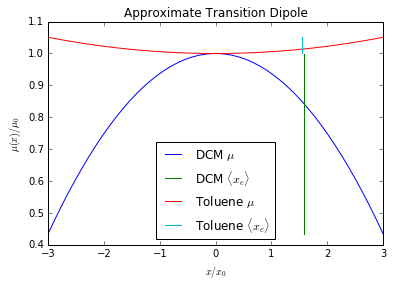

In [36]:
order = [2]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [1, 2, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[1, 2, 3]: [1.200110735400054, 43.801753083049626, -1.5627058468960717, -5.9423369867323288]


check for big off-diagonal values: 
[[ 0.53138738  0.30705452  0.00671629 -0.01760972]
 [ 0.30705452  0.20587919  0.00334268 -0.01459799]
 [ 0.00671629  0.00334268  0.00173635 -0.00060937]
 [-0.01760972 -0.01459799 -0.00060937  0.00149045]] 


HO/c model fit Found for voigt!  S=1.19053006394(1 +/- 1.2001107354), mu=[ 0.02030349 -0.0522634  -0.01273379] * x^ [1, 2, 3] * (1 +/- [43.801753083049626, -1.5627058468960717, -5.9423369867323288]) @ 95% Confidence
Naiive S_Condon=1.48970519775
peak ratio goodness of fit:
r^2_condon = 0.773843852749 	 r^2_model = 0.840358295933 	 improvement_factor = 1.08595331338
PREPARING ANALYSIS FOR A [1, 2, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT--

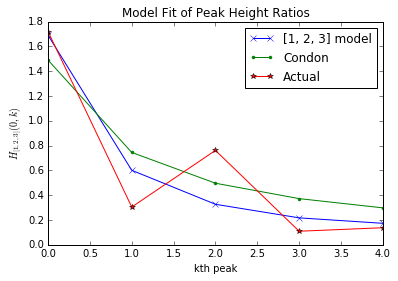

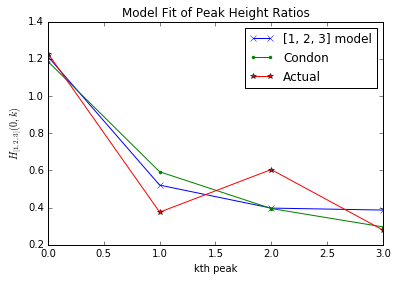

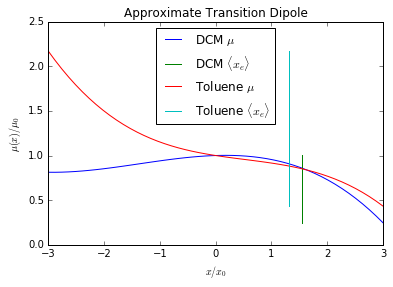

In [39]:
order = [1,2,3]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

In [37]:
PeakTools.table_generator([9,7], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (9, 7) }$ & 1.202  &  1.110 \\
$c_{ 9 }$ & -5.05e-05  &  -3.35e-05 \\
$c_{ 7 }$ & 3.72e-04  &  3.31e-04 \\
$r^2_{ (9, 7) }$ & 0.990  &  0.976 \\


In [38]:
PeakTools.table_generator([9], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (9,) }$ & 1.082  &  0.994 \\
$c_{ 9 }$ & -3.31e-05  &  -1.82e-05 \\
$r^2_{ (9,) }$ & 0.985  &  0.965 \\
